# CIFAR-10 detection Neural Network

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CIFAR-10-detection-Neural-Network" data-toc-modified-id="CIFAR-10-detection-Neural-Network-1">CIFAR-10 detection Neural Network</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1.1">Data</a></span></li><li><span><a href="#Dense-Model" data-toc-modified-id="Dense-Model-1.2">Dense Model</a></span><ul class="toc-item"><li><span><a href="#Flatten-first" data-toc-modified-id="Flatten-first-1.2.1">Flatten first</a></span></li><li><span><a href="#3-channels" data-toc-modified-id="3-channels-1.2.2">3 channels</a></span></li></ul></li><li><span><a href="#CNN-Model" data-toc-modified-id="CNN-Model-1.3">CNN Model</a></span></li></ul></li></ul></div>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, Input, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras import models
from tensorflow import nn
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt

/Users/Dilva/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Data

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

## Dense Model

### Flatten first

In [3]:
model_F = models.Sequential()
model_F.add(Flatten(input_shape=(32,32,3)))
model_F.add(Dense(1024, activation='relu'))
model_F.add(Dropout(0.2))
model_F.add(Dense(512, activation='relu'))
model_F.add(Dropout(0.2))
model_F.add(Dense(128, activation='relu'))
model_F.add(Dropout(0.2))
model_F.add(Dense(64, activation='relu'))
model_F.add(Dropout(0.2))
model_F.add(Dense(10))
model_F.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

In [28]:
model_F.compile(optimizer=Adagrad(learning_rate=0.01),
                loss=SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
epochs = 25
history_F = model_F.fit(train_images, 
                    train_labels, 
                    epochs=epochs, 
                    batch_size=128,
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 81us/sample - loss: 2.0733 - accuracy: 0.2303 - val_loss: 1.8928 - val_accuracy: 0.3220
Epoch 2/25
50000/50000 [==============================] - 3s 52us/sample - loss: 1.8985 - accuracy: 0.3139 - val_loss: 1.7617 - val_accuracy: 0.3630
Epoch 3/25
50000/50000 [==============================] - 3s 65us/sample - loss: 1.8229 - accuracy: 0.3442 - val_loss: 1.7064 - val_accuracy: 0.3866
Epoch 4/25
50000/50000 [==============================] - 3s 58us/sample - loss: 1.7692 - accuracy: 0.3647 - val_loss: 1.6607 - val_accuracy: 0.4074
Epoch 5/25
50000/50000 [==============================] - 3s 60us/sample - loss: 1.7271 - accuracy: 0.3837 - val_loss: 1.7358 - val_accuracy: 0.3841
Epoch 6/25
50000/50000 [==============================] - 3s 64us/sample - loss: 1.6962 - accuracy: 0.3948 - val_loss: 1.6013 - val_accuracy: 0.4284
Epoch 7/25
50000/50000 [==============================] 

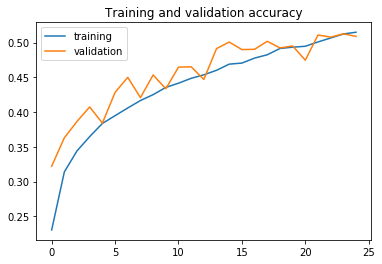

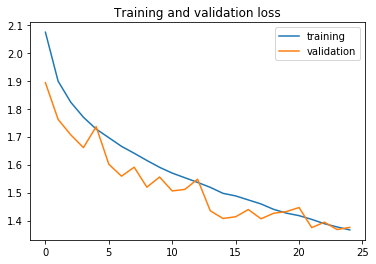

<Figure size 432x288 with 0 Axes>

In [29]:
# Training and validation accuracy / epoch
plt.plot(range(epochs), history_F.history['accuracy'], label="training")
plt.plot(range(epochs), history_F.history['val_accuracy'], label="validation")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Training and validation loss / epoch
plt.plot(range(epochs), history_F.history['loss'], label="training")
plt.plot(range(epochs), history_F.history['val_loss'], label="validation")
plt.title('Training and validation loss')
plt.legend()
plt.figure();

### 3 channels

In [7]:
model_D = models.Sequential()
model_D.add(Dense(512, activation='relu', input_shape=(32,32,3)))
model_D.add(Dropout(0.2))
model_D.add(Dense(128, activation='relu'))
model_D.add(Dropout(0.2))
model_D.add(Dense(64, activation='relu'))
model_D.add(Dropout(0.2))
model_D.add(Flatten())
model_D.add(Dense(10))
model_D.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 32, 512)       2048      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 512)       0         
_________________________________________________________________
dense_1 (Dense)              (None, 32, 32, 128)       65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
dense_2 (Dense)              (None, 32, 32, 64)        8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

In [8]:
model_D.compile(optimizer=Adagrad(learning_rate=0.01),
             loss=SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
epochs = 10
history_D = model_D.fit(train_images, 
                    train_labels, 
                    epochs=epochs, 
                    batch_size=128,
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.9541 - accuracy: 0.3039 - val_loss: 1.7612 - val_accuracy: 0.3776
Epoch 2/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.7218 - accuracy: 0.3995 - val_loss: 1.6680 - val_accuracy: 0.4141
Epoch 3/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.6326 - accuracy: 0.4313 - val_loss: 1.5844 - val_accuracy: 0.4482
Epoch 4/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.5790 - accuracy: 0.4507 - val_loss: 1.5502 - val_accuracy: 0.4485
Epoch 5/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.5431 - accuracy: 0.4634 - val_loss: 1.5288 - val_accuracy: 0.4613
Epoch 6/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.5178 - accuracy: 0.4710 - val_loss: 1.5119 - val_accuracy: 0.4621
Epoch 7/10
50000/50000 [==============================] 

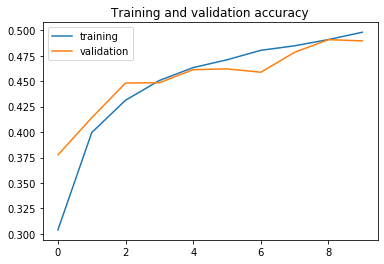

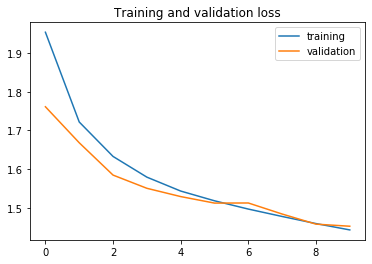

<Figure size 432x288 with 0 Axes>

In [9]:
# Training and validation accuracy / epoch
plt.plot(range(epochs), history_D.history['accuracy'], label="training")
plt.plot(range(epochs), history_D.history['val_accuracy'], label="validation")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Training and validation loss / epoch
plt.plot(range(epochs), history_D.history['loss'], label="training")
plt.plot(range(epochs), history_D.history['val_loss'], label="validation")
plt.title('Training and validation loss')
plt.legend()
plt.figure();

## CNN Model

In [4]:
model = models.Sequential()
model.add(Conv2D(512, 5, activation='relu', padding="same", input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding="same"))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding="same"))
model.add(MaxPooling2D((3,3), padding='same'))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 512)       38912     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 512)       2359808   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 512)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         589952    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [17]:
model.compile(optimizer=Adagrad(learning_rate=0.01),
             loss=SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
epochs = 25
history = model.fit(train_images, 
                    train_labels, 
                    epochs=epochs, 
                    batch_size=128,
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 48s 956us/sample - loss: 2.0825 - accuracy: 0.2434 - val_loss: 1.8199 - val_accuracy: 0.3640
Epoch 2/25
50000/50000 [==============================] - 45s 899us/sample - loss: 1.7336 - accuracy: 0.3790 - val_loss: 1.5758 - val_accuracy: 0.4309
Epoch 3/25
50000/50000 [==============================] - 45s 904us/sample - loss: 1.5399 - accuracy: 0.4482 - val_loss: 1.4374 - val_accuracy: 0.4859
Epoch 4/25
50000/50000 [==============================] - 45s 907us/sample - loss: 1.4248 - accuracy: 0.4889 - val_loss: 1.4606 - val_accuracy: 0.4808
Epoch 5/25
50000/50000 [==============================] - 45s 908us/sample - loss: 1.3377 - accuracy: 0.5225 - val_loss: 1.2882 - val_accuracy: 0.5396
Epoch 6/25
50000/50000 [==============================] - 46s 911us/sample - loss: 1.2678 - accuracy: 0.5477 - val_loss: 1.2787 - val_accuracy: 0.5423
Epoch 7/25
50000/50000 [====================

10000/10000 [==============================] - 3s 250us/sample - loss: 0.8347 - accuracy: 0.7255
Test accuracy : 0.7254999876022339


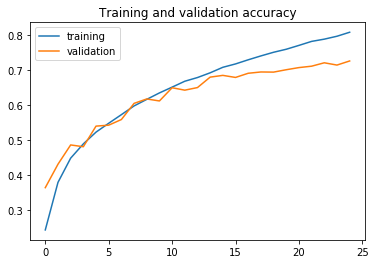

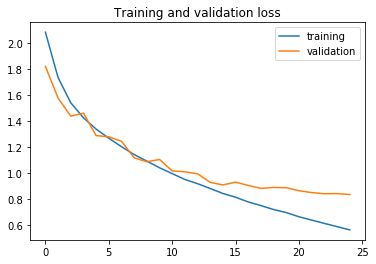

<Figure size 432x288 with 0 Axes>

In [18]:
# Training and validation accuracy / epoch
plt.plot(range(epochs), history.history['accuracy'], label="training")
plt.plot(range(epochs), history.history['val_accuracy'], label="validation")
plt.title('Training and validation accuracy')
plt.legend()


plt.figure();

# Training and validation loss / epoch
plt.plot(range(epochs), history.history['loss'], label="training")
plt.plot(range(epochs), history.history['val_loss'], label="validation")
plt.title('Training and validation loss')
plt.legend()

plt.figure();

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print("Test accuracy : {}".format(test_acc))